In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'c:\\Users\\jaymi\\Project 1 Dataset'

In [3]:
train_data=pd.read_excel("C:\\Users\\jaymi\\Project 1 Dataset/Data_Train.xlsx")

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train_data.isnull().sum()#the count is very less. only one missing value in two tables

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [ ]:
#Extraction of derived attributes. Part of data preparation

In [ ]:
data=train_data.copy()

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
#we do this because, the data is in the form of a string. So , it is very difficult to perform mathematical operations on the data.

The cells having date_of_journey have data type datetime64[ns] or M8[ns]. Both are the same. Here, 64 is in bits whereas 8 is in bytes. Also, M is a codeword for datetime

In [ ]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
for feature in ["Dep_Time","Arrival_Time","Date_of_Journey"]:
    change_into_datetime(feature)

In [ ]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
data["Journey_Day"]=data["Date_of_Journey"].dt.day #dt is the accessor

In [ ]:
data["Journey_Month"]=data["Date_of_Journey"].dt.month

In [ ]:
data["Journey_Year"]=data["Date_of_Journey"].dt.year

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-05 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-05 05:50:00,2024-05-05 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [ ]:
def extract_hour_min(df,col):
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute

In [ ]:
extract_hour_min(data,"Arrival_Time")

In [ ]:
extract_hour_min(data,"Dep_Time")

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-05 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20


In [ ]:
col_to_drop=["Dep_Time","Arrival_Time"]

data.drop(col_to_drop, axis=1, inplace=True)

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20


In [ ]:
data.shape

(10682, 16)

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute'],
      dtype='object')

In [ ]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

<Axes: >

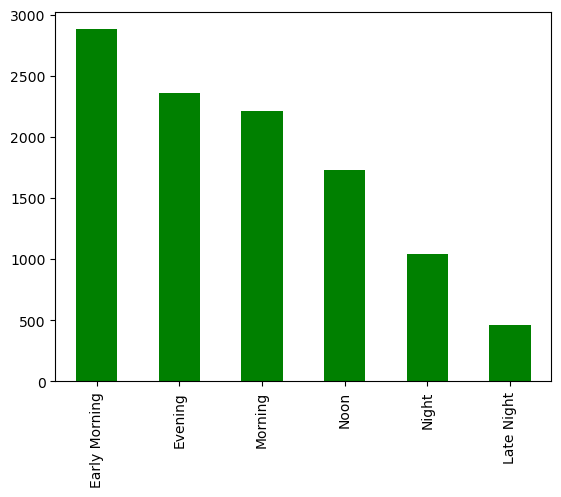

In [ ]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind="bar",color="g")

In [ ]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline #we need charts offline
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)#to set notebook in offline mode
cf.go_offline()

In [ ]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().iplot(kind="bar")

In [ ]:
#preprocessing the duration column.
#in this column, some rows have time in hrs and min , some have only in min and others have only in hrs
def preprocess_duration(x):
    if 'h' not in x:
        x="0h"+' '+x
    elif 'm' not in x:
        x=x+' '+'0m'
    return x

In [ ]:
data["Duration"]=data["Duration"].apply(preprocess_duration)

In [ ]:
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [ ]:
int(data["Duration"][0].split()[0][0:-1])

2

In [ ]:
data["Duration_hours"]=data["Duration"].apply(lambda x:int(x.split()[0][0:-1]))

In [ ]:
data["Duration_minute"]=data["Duration"].apply(lambda x:int(x.split()[1][0:-1]))

In [ ]:
data["Duration_total_minute"]=data["Duration"].str.replace('h',"*60").str.replace(' ',"+").str.replace('m','*1').apply(eval)
    

<Axes: xlabel='Duration_total_minute', ylabel='Price'>

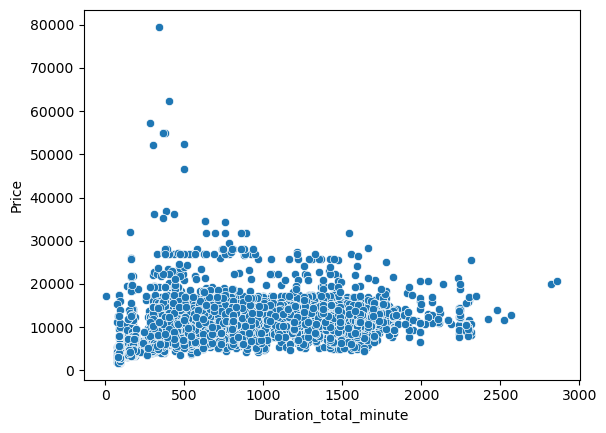

In [ ]:
#to analyze whether, flight duration impacts price. both are continuous variables so, we can use scatter plots
#scatter plot shows relation as well as giving best fit line
sns.scatterplot(x="Duration_total_minute",y="Price",data=data)


<Axes: xlabel='Duration_total_minute', ylabel='Price'>

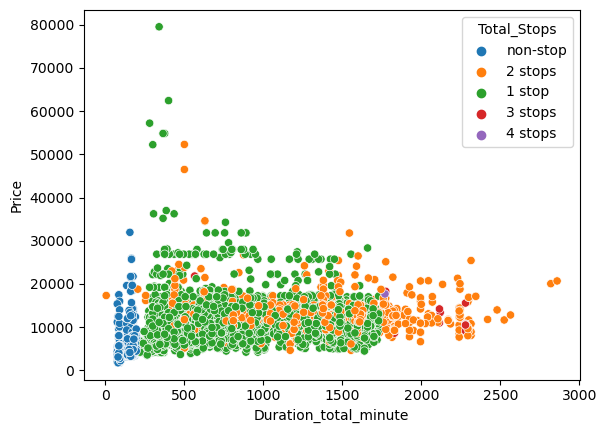

In [ ]:
sns.scatterplot(x="Duration_total_minute",y="Price",data=data,hue="Total_Stops")

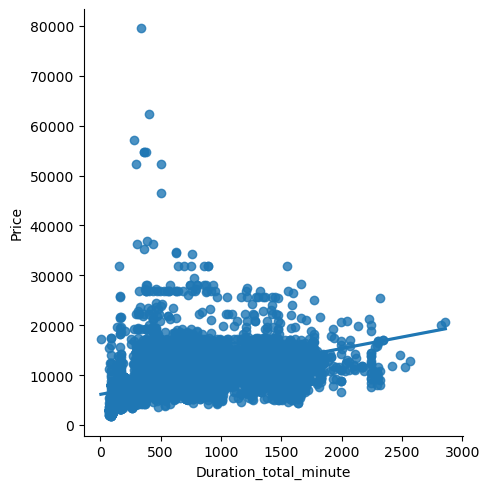

In [ ]:
sns.lmplot(x="Duration_total_minute",y="Price",data=data)

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minute,Duration_total_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50,7,25,445


In [ ]:
data[data["Airline"]=="Jet Airways"].groupby("Route").size().sort_values(ascending=False).head(10)


Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
dtype: int64

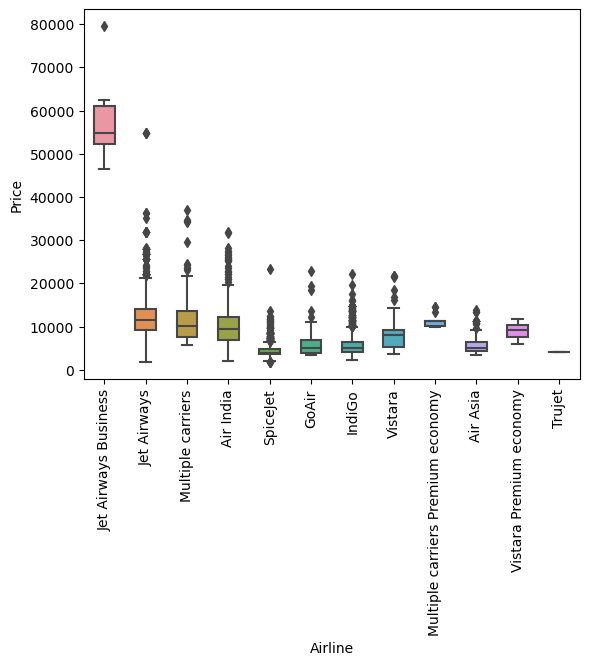

In [ ]:
sns.boxplot(x="Airline",y="Price",data=data.sort_values("Price",ascending=False),width=0.5)
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
cat_col=[col for col in data.columns if data[col].dtype=="object"]

In [ ]:
num_col=[col for col in data.columns if data[col].dtype!="object"]

In [ ]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
for sub_category in data["Source"].unique():
    data["Source_"+sub_category]=data["Source"].apply(lambda x: 1 if x==sub_category else 0)

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minute,Duration_total_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,5,50,7,25,445,0,1,0,0,0


In [ ]:
data['Airline'].nunique()

12

In [ ]:
airlines=data.groupby(["Airline"])["Price"].mean().sort_values().index

In [ ]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
dict_airlines={key:index for index,key in enumerate(airlines,0)}

In [ ]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
data["Airline"]=data["Airline"].map(dict_airlines)

In [ ]:
data["Airline"]

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [ ]:
data["Destination"].replace("New Delhi","Delhi", inplace=True)

In [ ]:
data["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
dest=data.groupby("Destination")["Price"].mean().sort_values().index

In [ ]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [ ]:
dict_dest={key:index for index,key in enumerate(dest,0)}

In [ ]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [ ]:
data["Destination"]=data["Destination"].map(dict_dest)

In [ ]:
data["Destination"]

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minute,Duration_total_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,9,25,19,0,1140,0,0,1,0,0


In [ ]:
#Employing label encoding
data_stops=data.groupby("Total_Stops")["Total_Stops"].unique().index

In [ ]:
data_stops

Index(['1 stop', '2 stops', '3 stops', '4 stops', 'non-stop'], dtype='object', name='Total_Stops')

In [ ]:
stop={'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, 'non-stop':0}
    

In [ ]:
data["Total_Stops"]=data["Total_Stops"].map(stop)

In [ ]:
data["Total_Stops"]

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [ ]:
data["Additional_Info"].value_counts()/len(data) #78% data is unnecessary

No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: Additional_Info, dtype: float64

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minute,Duration_total_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0


In [ ]:
data.drop(columns=["Route","Additional_Info","Date_of_Journey","Duration_total_minute","Source"],axis=1,inplace=True)

In [ ]:
data.drop("Journey_Year",axis=1,inplace=True)

In [ ]:
data

,Airline,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,5,1,13,15,5,50,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,6,9,4,25,9,25,19,0,0,0,1,0,0
3,3,3,5h 25m,1,6218,5,12,23,30,18,5,5,25,0,1,0,0,0
4,3,2,4h 45m,1,13302,3,1,21,35,16,50,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,2h 30m,0,4107,4,9,22,25,19,55,2,30,0,1,0,0,0
10679,7,3,2h 35m,0,4145,27,4,23,20,20,45,2,35,0,1,0,0,0
10680,10,2,3h 0m,0,7229,27,4,11,20,8,20,3,0,1,0,0,0,0
10681,5,2,2h 40m,0,12648,3,1,14,10,11,30,2,40,1,0,0,0,0


In [ ]:
data.drop("Duration",axis=1,inplace=True)

In [ ]:
data

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,4,25,9,25,19,0,0,0,1,0,0
3,3,3,1,6218,5,12,23,30,18,5,5,25,0,1,0,0,0
4,3,2,1,13302,3,1,21,35,16,50,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,4107,4,9,22,25,19,55,2,30,0,1,0,0,0
10679,7,3,0,4145,27,4,23,20,20,45,2,35,0,1,0,0,0
10680,10,2,0,7229,27,4,11,20,8,20,3,0,1,0,0,0,0
10681,5,2,0,12648,3,1,14,10,11,30,2,40,1,0,0,0,0


In [ ]:
#plot creation for outlier detection
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2,orient='h')
    sns.distplot(df[col],ax=ax3,kde=False)
    
    

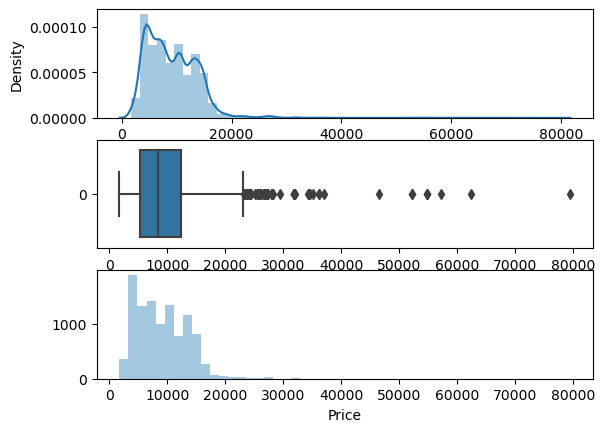

In [ ]:
plot(data,'Price')

In [ ]:
q1=data["Price"].quantile(0.25)
q3=data["Price"].quantile(0.75)

iqr=q3-q1
maximum=q3+1.5*iqr
minimum=q1-1.5*iqr

In [ ]:
print([price for price in data["Price"] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [ ]:
len([price for price in data["Price"] if price>maximum or price<minimum])

94

In [ ]:
data["Price"]=np.where(data["Price"]>35000,data["Price"].median(),data["Price"])

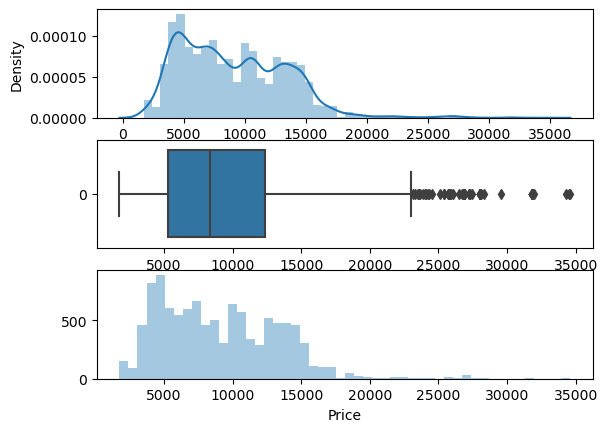

In [ ]:
plot(data,'Price')

In [ ]:
X=data.drop("Price",axis=1)
y=data["Price"]

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
imp=mutual_info_regression(X,y)

In [ ]:
imp

array([0.97534916, 1.003898  , 0.78952878, 0.1895176 , 0.2348943 ,
       0.40741237, 0.34492995, 0.33377745, 0.26818964, 0.47084552,
       0.34463913, 0.39103241, 0.45185758, 0.519192  , 0.12905724,
       0.20542515])

In [ ]:
pd.DataFrame(imp)

,0
0,0.975349
1,1.003898
2,0.789529
3,0.189518
4,0.234894
5,0.407412
6,0.344930
7,0.333777
8,0.268190
9,0.470846


In [ ]:
imp_df=pd.DataFrame(imp,index=X.columns)

In [ ]:
imp_df.columns=['importance']

In [ ]:
imp_df

,importance
Airline,0.975349
Destination,1.003898
Total_Stops,0.789529
Journey_Day,0.189518
Journey_Month,0.234894
Arrival_Time_hour,0.407412
Arrival_Time_minute,0.344930
Dep_Time_hour,0.333777
Dep_Time_minute,0.268190
Duration_hours,0.470846


In [ ]:
imp_df.sort_values(by="importance",ascending=False)

,importance
Destination,1.003898
Airline,0.975349
Total_Stops,0.789529
Source_Delhi,0.519192
Duration_hours,0.470846
Source_Kolkata,0.451858
Arrival_Time_hour,0.407412
Source_Banglore,0.391032
Arrival_Time_minute,0.344930
Duration_minute,0.344639


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ml_model=RandomForestRegressor()

In [ ]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=ml_model.predict(X_test)

In [ ]:
y_pred

array([16715.33,  6311.5 ,  8809.6 , ...,  3513.1 ,  6412.8 ,  7024.15])

In [ ]:
from sklearn import metrics

In [ ]:
metrics.r2_score(y_test,y_pred)

0.8073686607730548

In [ ]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import pickle

In [ ]:
file=open(r'C:\Users\jaymi\Project 1 Dataset/rf_random.pkl','wb')

In [ ]:
pickle.dump(ml_model,file)

In [ ]:
model=open(r'C:\Users\jaymi\Project 1 Dataset/rf_random.pkl','rb')

In [ ]:
forest=pickle.load(model)

In [ ]:
y_pred2=forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_pred2)

0.8073686607730548